In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import normal_modes as nm

In [67]:
def t_mat(m):
    
    return np.diag([m,m])

In [68]:
def t_inv_mat(m):
   
    return np.diag([1.0/m, 1.0/m])

In [69]:
g=9.8
l=10

def v_mat(m,k):
  
    return np.array([[m*g/l+k,-k], [-k,m*g/l+k]])

In [70]:
def fun(y, t, m,  k):
    
    w = -np.dot(t_inv_mat(m), np.dot(v_mat(m,k), y[2:]))
    
    return np.concatenate([w[:], y[:2]])

In [71]:
def sol(y_0, t, m, k):
    
    return odeint(fun, y_0, t, args=(m, k))

In [72]:
m = 1
k = 4
t_end = 20.0
delt = 12.0
num_points = 400

y_0 = np.array([0.0, 0.0,1.0,2.0])

In [73]:
time = np.linspace(0.0, t_end, num_points)

In [74]:
soln = sol(y_0, time, m, k)

In [75]:
wn = nm.NormalModes(t_mat(m), v_mat(m,k))

In [76]:
print('frequencies are', wn.omega)

frequencies are [ 0.98994949  2.99666481]


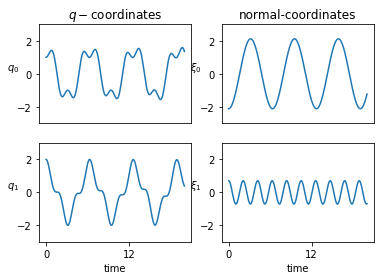

In [77]:
for ind in range(2):
    plt.subplot(221 + 2*ind)
    plt.plot(time, soln[:, 2 + ind])
    plt.ylabel(r'$q_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'$q-$coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
for ind in range(2):
    plt.subplot(221 + 2*ind + 1)
    soln_norm = wn.original_2_normal(soln[:, 2:].T).T    
    plt.plot(time, soln_norm[:, ind])
    plt.ylabel(r'$\xi_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'normal-coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
plt.show()